# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: KANG Jiale

## Imports

Please do **not** import any other library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, chi2, gaussian_kde

In [3]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [4]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [6]:
regions = list(df.region.unique())

In [7]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [8]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [9]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [10]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

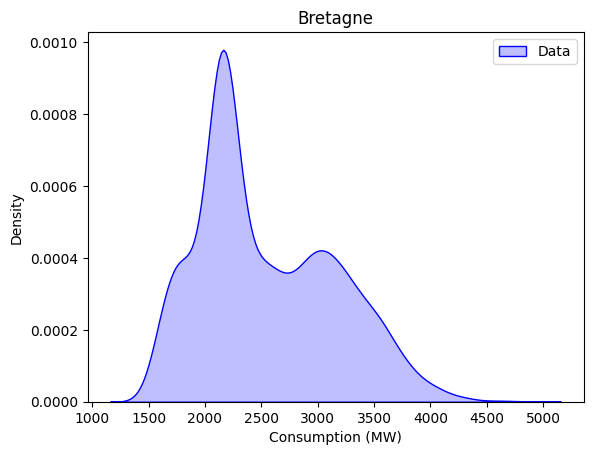

In [11]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:

$$
\begin{aligned}
    E(\hat{\mu}) &= E\left( \frac{1}{n}\sum_{i=1}^{n}x_i \right) = \frac{1}{n} \sum_{i=1}^{n} E(x_i) = \mu \\

    E(\hat{\sigma^2}) &= E\left( \frac{1}{n-1}\sum_{i=1}^n(x_i-\hat{\mu})^2 \right) \\
        &= \frac{1}{n-1} E\left(\sum_{i=1}^{n}((x_i-\mu)-(\hat{\mu}-\mu))^2\right) \\
        &= \frac{1}{n-1} E\left(\sum_{i=1}^{n}(x_i-\mu)^2 - 2(\hat{\mu}-\mu)\sum_{i=1}^{n}(x_i-\mu) +  n(\hat{\mu}-\mu)^2\right) \\
        &= \frac{1}{n-1} E\left(\sum_{i=1}^{n}(x_i-\mu)^2 - n(\hat{\mu}-\mu)^2 \right) \\
        &= \frac{1}{n-1} \sum_{i=1}^{n} E(x_i-\mu)^2 - \frac{n}{n-1}E(\hat{\mu}-\mu)^2 \\
        &= \frac{n}{n-1} \sigma^2 - \frac{n}{n-1} E(\hat{\mu}-E(\hat{\mu})) \\
        &= \frac{n}{n-1} (\sigma^2 - \sigma_{\hat{\mu}}^2) 
\end{aligned}
$$

For the term $\sigma_{\hat{\mu}}^2$, $\sigma_{\hat{\mu}}^2 = \text{var}(\frac{1}{n} \sum_{i=1}^{n}x_i) = \frac{1}{n}\sigma^2$.

Therefore, $E(\hat{\sigma^2}) = \frac{n}{n-1} (\sigma^2 - \frac{1}{n}\sigma^2) = \sigma^2 $, which shows that $\hat{\mu}$ and $\hat{\sigma^2}$ are unbiased.


2. Give the values obtained for the mean and the standard deviation using these estimators.

In [12]:
data = np.array(df_region.consumption)
mu_hat = np.mean(data)
print("mean is: ",mu_hat)
sigma_hat = np.sqrt(np.sum((data - mu_hat)**2) / (len(data) - 1))
print("standard deviation is: ",sigma_hat)

mean is:  2546.536155666579
standard deviation is:  604.9429842099315


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [13]:
mean = np.mean(data)
variance = np.var(data, ddof=1)
new_data = np.random.normal(loc=mean, scale=np.sqrt(variance), size=len(data))

4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

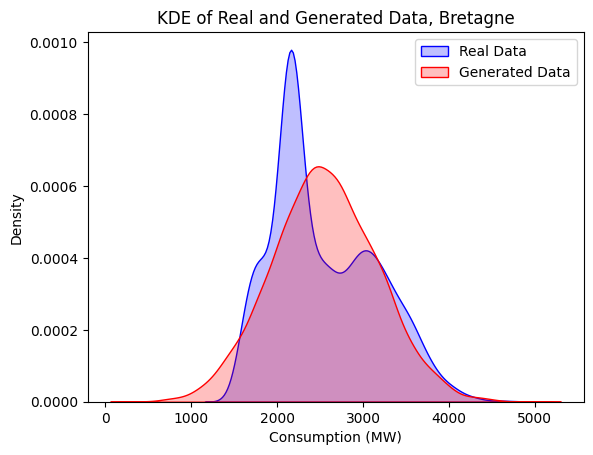

In [14]:
sns.kdeplot(data, label="Real Data", color="blue", fill=True)
sns.kdeplot(new_data, label="Generated Data", color="red", fill=True)
plt.xlabel("Consumption (MW)")
plt.ylabel("Density")
plt.legend()
plt.title("KDE of Real and Generated Data, Bretagne")
plt.show()

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

In [15]:
def selection_winter(region,df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    start_month = 12
    end_month = 3
    start_day = 22
    end_day = 21
    df_winter = df[( ((df['month'] == start_month) & (df['day'] >= start_day)) |
                    ((df['month'] == end_month) & (df['day'] <= end_day)) |
                    ((df['month'] > start_month) | (df['month'] < end_month)))
                    & (df.region == region)]
    return df_winter

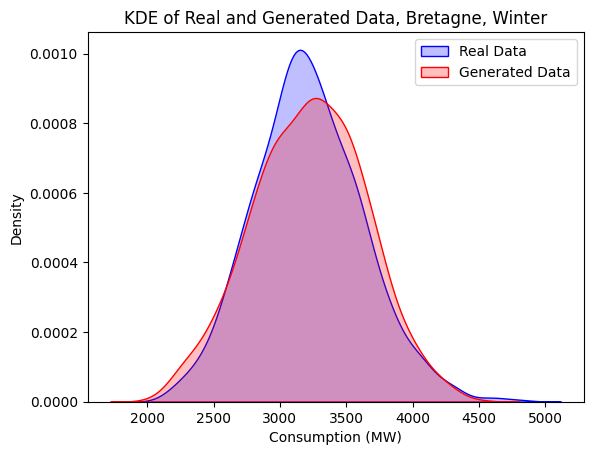

In [16]:
df_winter = selection_winter("Bretagne",df)
# calculer the parameters and generate new data
data = df_winter.consumption
mean = np.mean(data)
variance = np.var(data, ddof=0)
new_data = np.random.normal(loc=mean, scale=np.sqrt(variance), size=len(data))

# plot kde
sns.kdeplot(data, label="Real Data", color="blue", fill=True)
sns.kdeplot(new_data, label="Generated Data", color="red", fill=True)
plt.xlabel("Consumption (MW)")
plt.ylabel("Density")
plt.legend()
plt.title("KDE of Real and Generated Data, Bretagne, Winter")
plt.show()

6. In which case the Gaussian model seems more appropriate?

According to the graph, the case of winter will be more appropriated with Gaussian model.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser:

Since $|f(x)-g(x)| \leq 0$, $d(f,g) \leq 0$; 

Since $|f(x)-g(x)| \leq |f(x)|+|g(x)| \leq 2\times \max \left(f(x),g(x)\right)$ and $f, g$ are pdf which means $\int f(x) dx = 1$. Therefore, $d(f,g) \leq 1$.

$d(f,g)=0$ means $|f(x)-g(x)|=0$, if and only if $f=g$.

$d(f,g)=1$ means $\int |f(x)-g(x)| = 2$, which equals to twice of L1-norm, happens if and only if $f$ and $g$ have disjoint supports.

2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [17]:
def numerical_integral_rectangular(f, a, b, n):
    dx = (b - a) / n
    integral = 0.0
    for i in range(n):
        x_i = a + i * dx  
        integral += f(x_i) * dx
    return integral

In [18]:
def calcular_dissimilarity(data):
    # kde of real data
    kde = gaussian_kde(data)
    # density of the Gaussian model
    def gaussian_pdf(x, mean=0, std_dev=1):
        return 1.0 / (np.sqrt(2 * np.pi * std_dev**2)) * np.exp(-((x - mean)**2) / (2 * std_dev**2))
    # Define the function for the absolute difference between f(x) and g(x)
    def absolute_difference(x):
        return abs(kde(x) - gaussian_pdf(x,np.mean(data),np.sqrt(np.var(data,ddof=1))))
    # Compute the dissimilarity
    dissimilarity = numerical_integral_rectangular(absolute_difference, min(data), max(data), len(data)) 
    return dissimilarity[0]/2.0

In [19]:
data = pd.array(df_region.consumption)
dissimilarity = calcular_dissimilarity(data)
print("dissimilarity between the kde of real data and the density of the Gaussian model is: ",(dissimilarity))

dissimilarity between the kde of real data and the density of the Gaussian model is:  0.16179103900928155


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [20]:
data = df_winter.consumption
dissimilarity = calcular_dissimilarity(data)
print("dissimilarity between the kde of real data and the density of the Gaussian model (for region Bretagne in winter) is",(dissimilarity))

dissimilarity between the kde of real data and the density of the Gaussian model (for region Bretagne in winter) is 0.029453569247634426


4. Do the same for all regions. Give the result as a single dataframe.

In [21]:
dissimilarity_values = []
for region in regions:
    df_region = df[df.region == region]
    data = df_region.consumption
    dissimilarity_values.append(calcular_dissimilarity(data))
res = [{"Region": region, "Dissimilarity": dissimilarity} for region, dissimilarity in zip(regions, dissimilarity_values)]
df_dissimilarity = pd.DataFrame(res)
display(df_dissimilarity)

dissimilarity_values = []
for region in regions:
    df_winter = selection_winter(region,df)
    data = df_winter.consumption
    dissimilarity_values.append(calcular_dissimilarity(data))
res = [{"Region": region, "Dissimilarity": dissimilarity} for region, dissimilarity in zip(regions, dissimilarity_values)]
df_dissimilarity = pd.DataFrame(res)
display(df_dissimilarity)

,Region,Dissimilarity
0,Auvergne-Rhône-Alpes,0.152991
1,Bourgogne-Franche-Comté,0.119691
2,Bretagne,0.161791
3,Centre-Val de Loire,0.172779
4,Grand Est,0.107356
5,Hauts-de-France,0.119956
6,Normandie,0.172449
7,Nouvelle-Aquitaine,0.195033
8,Occitanie,0.198933
9,Pays de la Loire,0.152973


,Region,Dissimilarity
0,Auvergne-Rhône-Alpes,0.037064
1,Bourgogne-Franche-Comté,0.036724
2,Bretagne,0.029454
3,Centre-Val de Loire,0.042216
4,Grand Est,0.037371
5,Hauts-de-France,0.026281
6,Normandie,0.041305
7,Nouvelle-Aquitaine,0.052099
8,Occitanie,0.059802
9,Pays de la Loire,0.036725


5. Which region is best fitted by a Gaussian model in winter?

In [22]:
best_fitted_region = df_dissimilarity.loc[df_dissimilarity["Dissimilarity"].idxmin()]["Region"]
print("The region best fitted by a Gaussian model is: ",best_fitted_region)

The region best fitted by a Gaussian model is:  Hauts-de-France


6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

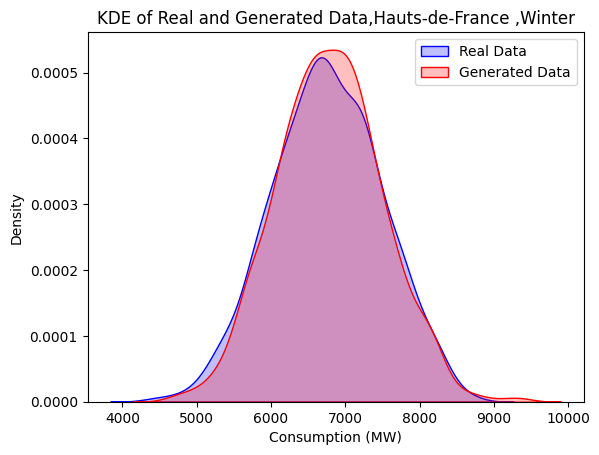

In [23]:
df_winter = selection_winter(best_fitted_region,df)
data = df_winter.consumption
mean = np.mean(data)
variance = np.var(data, ddof=0)
new_data = np.random.normal(loc=mean, scale=np.sqrt(variance), size=len(data))

# plot kde
sns.kdeplot(data, label="Real Data", color="blue", fill=True)
sns.kdeplot(new_data, label="Generated Data", color="red", fill=True)
plt.xlabel("Consumption (MW)")
plt.ylabel("Density")
plt.legend()
string_title = "KDE of Real and Generated Data,"+best_fitted_region +" ,Winter"
plt.title(string_title)
plt.show()

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$ MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$ MW and standard deviation $\sigma_0=500$ MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:

$$
\begin{aligned}
\Pi(\mu|x) &\propto \mathbb{P}(x|\mu)\Pi(\mu) \\
    &\propto e^{-\sum_{i=1}^{n}\frac{(x_i-\mu)^2}{2\sigma^2}}e^{\frac{(\mu-\mu_0)^2}{2\sigma_0^2}} \\
    &\propto e^{-\frac{1}{2}\left[\left(\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}\right)\mu^2 - 2\left(\frac{\mu_0}{\sigma_0^2}+\frac{S}{\sigma^2} \right)\mu\right]}
\end{aligned}
$$
where $S=\sum_{i=1}^{n}x_i$.

Therefore, 
$$
\mu|x \sim \mathcal{N} \left(\frac{\frac{\mu_0}{\sigma_0^2}+\frac{S}{\sigma^2}}{\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}}, \frac{1}{\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2} } \right)
$$


2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [24]:
def calcular_posterior_distribution_parameters(data,sigma=400,mu0=3500,sigma0=500):
    n = len(data)
    S = np.sum(data)
    numerator = (mu0 / sigma0**2) + (S / sigma**2)
    denominator = (1 / sigma0**2) + (n / sigma**2)
    res_mu = numerator / denominator
    res_sigma = np.sqrt(1 / ((1 / sigma0**2) + (n / sigma**2)))
    return res_mu, res_sigma

In [25]:
df_winter = selection_winter("Bretagne",df)
df_winter = df_winter.copy()
df_winter['date'] = pd.to_datetime(df_winter['date'])
df_winter['year'] = df_winter['date'].dt.year
years = list(df_winter.year.unique())

mu_values = []
sigma2_values = []
for year in years:
    data = df_winter[df_winter.year==year]
    data = data.consumption
    mu, sigma = calcular_posterior_distribution_parameters(data)
    mu_values.append(mu)
    sigma2_values.append(sigma**2)
res = [{"year": year, "Mean": mu, "Variance": sigma2} for year, mu, sigma2 in zip(years, mu_values, sigma2_values)]
posterior_distribution_parameters = pd.DataFrame(res)
display(posterior_distribution_parameters)

,year,Mean,Variance
0,2013,3343.413504,1765.225066
1,2014,3118.424537,1765.225066
2,2015,3167.398500,1765.225066
3,2016,3207.507639,1745.962462
4,2017,3251.224625,1765.225066
5,2018,3315.081642,1765.225066
6,2019,3195.200794,1765.225066
7,2020,3145.504147,1745.962462
8,2021,3341.946161,1765.225066
9,2022,3165.081642,1765.225066


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

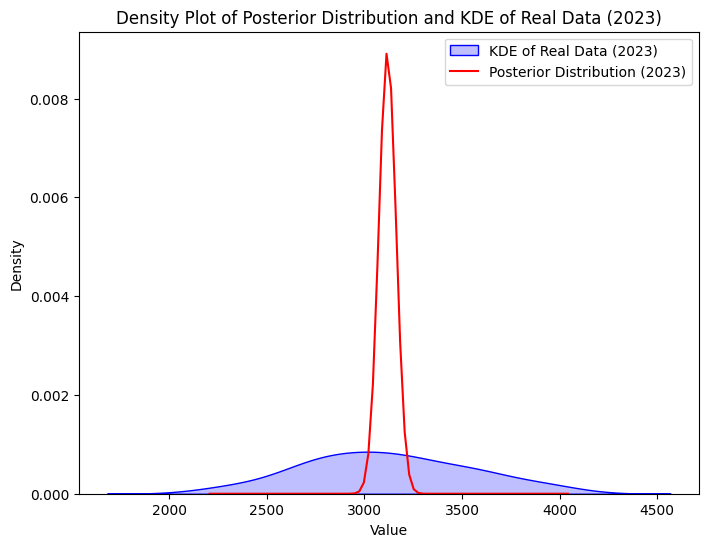

In [26]:
data = df_winter[df_winter.year == 2023].consumption
posterior_mean =  posterior_distribution_parameters[posterior_distribution_parameters.year==2023].Mean
posterior_std_dev =  np.double(np.sqrt(posterior_distribution_parameters[posterior_distribution_parameters.year==2023].Variance))
x = np.linspace(min(data),max(data),len(data))
posterior_pdf = norm.pdf(x, loc=posterior_mean, scale=posterior_std_dev)

plt.figure(figsize=(8, 6))
sns.kdeplot(data, label='KDE of Real Data (2023)', fill=True, color='blue')
plt.plot(x, posterior_pdf, label='Posterior Distribution (2023)', color='red')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of Posterior Distribution and KDE of Real Data (2023)')
plt.show()

4. Discuss the results, comparing to those obtained in part A.

Your answer:

In part A, we could know the mean value but with less pobability. Instead, in this part, according to the data we collected in Bretagne winter, it has stronger possibility to say that the mean value is around 3100.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer:

$H_0 = \{\sigma= \sigma_0=400\}, H_1 = \{\sigma = \sigma_1=500\}$

Likelyhood ratio: $\frac{p_1(x)}{p_0(x)} \propto \frac{e^{-\frac{1}{2\sigma_1^2}\sum_{i=1}^{n}(x_i-\mu)^2}}{e^{-\frac{1}{2\sigma_0^2}\sum_{i=1}^{n}(x_i-\mu)^2}} \propto e^{\frac{1}{2}\left(\frac{1}{\sigma_0^2}-\frac{1}{\sigma_1^2} \right)S}$ with $S = \sum_{i=1}^{n}(x_i-\mu)^2$

We propose the decision function $ \delta(x) = 1_{S>c} $, $S\sim \sigma^2 Z $ and $Z \sim \chi^2(n)$.
Therefore, $\alpha =  \mathbb{P}_0(\delta(x)=1) = \mathbb{P}_0(\sigma^2 Z>c) = \mathbb{P}_0\left(Z>\frac{c}{\sigma^2}\right)$

Thus, $c = \sigma_0^2Q(1-\alpha) $, where $Q(.)$ is a Quantile function.


2. Provide the result of this test for $\alpha=1\%$.

In [27]:
mu = 3200
sigma0 = 400
sigma1 = 500
alpha = 0.01

df_winter = selection_winter("Bretagne",df)
df_winter = df_winter.copy()
df_winter['date'] = pd.to_datetime(df_winter['date'])
df_winter['year'] = df_winter['date'].dt.year
data = df_winter[df_winter.year==2023].consumption

S = np.sum((data-mu)**2)
n = len(data)
c = sigma0**2 * chi2.ppf(1 - alpha, n)
reject_null = abs(S) > c
print("S_statistic:", S)
print("critical_value:", c)
print("Reject Null Hypothesis (at alpha =", alpha, ")?", reject_null)

S_statistic: 14600063
critical_value: 17972606.803247597
Reject Null Hypothesis (at alpha = 0.01 )? False


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

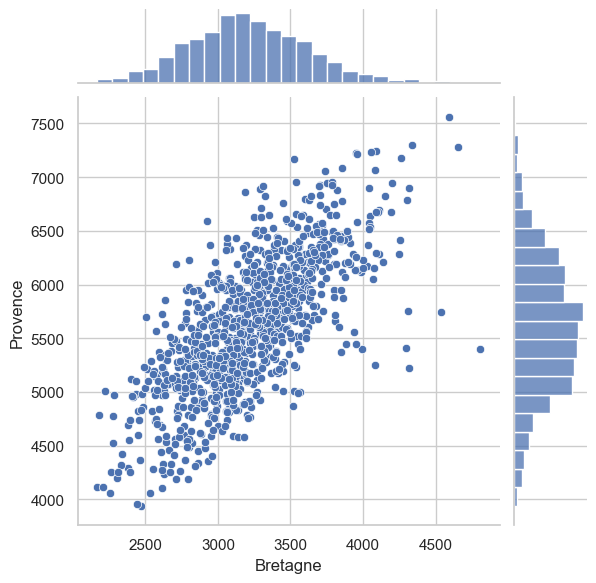

In [28]:
df_winter_Bretagne = selection_winter("Bretagne",df)
data_winter_Bretagne = list(df_winter_Bretagne.consumption)
df_winter_Provence = selection_winter("Provence-Alpes-Côte d'Azur",df)
data_winter_Provence = list(df_winter_Provence.consumption)
tmp = [{"Bretagne": conso_b, "Provence": conso_p} for conso_b, conso_p in zip(data_winter_Bretagne, data_winter_Provence)]
df_winter = pd.DataFrame(tmp)
sns.set(style="whitegrid")
sns.jointplot(data=df_winter, x='Bretagne', y='Provence', kind='scatter')
plt.show()

2. Do you think the power consumption in these two regions is independent?

Your answer:

According to the figure of joint distribution of power consumption in these 2 regions, they might be dependent, because it shows a kind of linear relation between these regions' consumption.

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Your answer:

Let $X$ be the consumption in the region of Bretagne, $Y$ be the consumption in the region of Provence-Alpes-Côte d'Azur.
Propose the hypothesis: $H_0=\{X \perp Y\}, H_1=\{\neg(X \perp Y)\}$. Choose two partitions $A_k$ and $B_l$ and $X_i \in A_k$, $Y_j \in B_l$.
$$
T(X,Y) = \sum_{i,j} \frac{(N_{ij}-\frac{N_i N_j}{n})^2}{\frac{N_i N_j}{n}}
$$
where $N_{ij}=\sum_{t=1}^{n} 1_{X_t \in A_i, Y_t \in B_j}, N_i = \sum_{t=1}^{n} 1_{X_t \in A_i}, N_j = \sum_{t=1}^{n} 1_{Y_t \in B_j}$ and therefore, when $n \to \infty$, $T\sim \chi^2\left( (K-1)(L-1) \right)$. For the decide function, $\delta(x,y)=1_{T(X,Y)>c}$. 

Thus, $\alpha = \mathbb{P}_0(\delta(x,y)=1)=\mathbb{P}_0(T(X,Y)>c)$.

4. Give the result of this test for $\alpha=1\%$. 

In [29]:
contingency_table = pd.crosstab(df_winter['Bretagne'],df_winter['Provence'],margins=True)
observed = contingency_table.to_numpy()
chi2_statistic = np.sum((observed - np.sum(observed, axis=0) / np.sum(observed))**2 / (np.sum(observed, axis=0) / np.sum(observed)/2))
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
alpha = 0.01

critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)
reject_null = chi2_statistic > critical_value
print("chi2_statistic:", chi2_statistic)
print("critical_value:", critical_value)
print("Reject Null Hypothesis?", reject_null)

chi2_statistic: 10829494.0
critical_value: 582859.2500929915
Reject Null Hypothesis? True


## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

Your answer:

$X \sim \mathcal{N}(\mu, \sigma^2)$, we propose $Z = \frac{\bar{X}-\mu}{\sqrt{\frac{V_0}{n}}} $, where $V_0=\frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2 $. Thus, $Z \sim St.(n-1)$, critical value $c = Q(1-\alpha/2)$.

$\mathbb{P}(-c<Z<c) = 1-\alpha \Leftrightarrow \mathbb{P}\left(\mu \in \left(\bar{X}-c\sqrt{\frac{V_0}{n}}, \bar{X}+c\sqrt{\frac{V_0}{n}}\right) \right) = 1-\alpha$.

Therefore, the confidence interval is $\left(\bar{X}-c\sqrt{\frac{V_0}{n}}, \bar{X}+c\sqrt{\frac{V_0}{n}}\right)$, where $V_0=\frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2 $.



In [30]:
df_winter = selection_winter("Bretagne",df)
df_winter = df_winter.copy()
# df_winter['date'] = pd.to_datetime(df_winter['date'])
data = df_winter.consumption
# df_winter['year'] = df_winter['date'].dt.year
# data = df_winter[df_winter.year==2023].consumption

confidence_level = 0.95
sample_mean = np.mean(data)

V0 = np.sum((data - sample_mean)**2) / (len(data) - 1)

alpha = 1 - confidence_level
degrees_of_freedom = len(data) - 1
c = norm.ppf(1 - alpha / 2)/np.sqrt(chi2.ppf(1 - alpha / 2, degrees_of_freedom) / len(data))

margin_of_error = c * np.sqrt(V0 / len(data))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
print("Confidence Interval: [{}, {}]".format(lower_bound, upper_bound))

Confidence Interval: [3189.639756644493, 3238.7166588341224]


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In [31]:
null_mean = 3100
alpha = 0.05

df_winter = selection_winter("Bretagne",df)
df_winter = df_winter.copy()
df_winter['date'] = pd.to_datetime(df_winter['date'])
df_winter['year'] = df_winter['date'].dt.year
data = df_winter[df_winter.year==2023].consumption

sample_mean = np.mean(data)
sample_std_dev = np.std(data, ddof=1)

t_statistic = (sample_mean - null_mean) / (sample_std_dev / np.sqrt(len(data)))
degrees_of_freedom = len(data) - 1
t_critical = norm.ppf(1 - alpha / 2)/np.sqrt(chi2.ppf(1 - alpha / 2, degrees_of_freedom) / len(data))

reject_null = abs(t_statistic) > t_critical

print("T-Statistic:", t_statistic)
print("Critical Value:", t_critical)
print("Reject Null Hypothesis?", reject_null)

T-Statistic: 0.30764815980243937
Critical Value: 1.7069584494286003
Reject Null Hypothesis? False
